In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
bottle = pd.read_csv('calcofi/bottle.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bottle = bottle[['Salnty', 'T_degC']]
bottle = bottle[:][:500]

In [5]:
bottle.head(20)

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
5,33.431,10.45
6,33.440,10.45
7,33.424,10.24
8,33.420,10.06
9,33.494,9.86


As you see, there are some NaN values in our data. We can use "dropna" or "fillna" hear. Check their documentations.

In [6]:
#bottle.dropna(inplace=True)

In [7]:
bottle.fillna(method='ffill', inplace=True)

In [8]:
X, y = bottle.Salnty, bottle.T_degC

In [9]:
X = np.array(X).reshape(-1, 1)

In [10]:
y = np.array(y).reshape(-1, 1)

What does -1 mean? Check it.

In [11]:
X.shape, y.shape

((500, 1), (500, 1))

Text(0, 0.5, 'Deg')

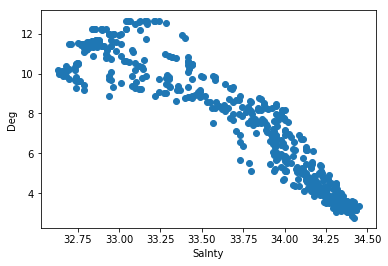

In [12]:
plt.scatter(X, y)
plt.xlabel('Salnty')
plt.ylabel('Deg')

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((350, 1), (150, 1), (350, 1), (150, 1))

In [15]:
model = LinearRegression().fit(x_train, y_train)

In [16]:
model.score(x_test, y_test)

0.8202846997336314

In [17]:
y_pred = model.predict(x_test)

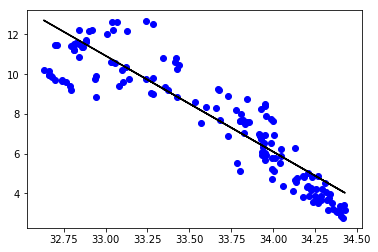

In [18]:
plt.scatter(x_test, y_test, color='b')
plt.plot(x_test, y_pred, color='k')